In [6]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# # pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
# pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

Wall time: 404 ms


In [18]:
search(BES_Panel,"country|britishness|englishness|europeanness|scottishness|welshness|wt")

wt                 31468
britishness        31468
scottishness        2730
welshness           1804
englishness        31468
europeanness       31468
enviroGrowth       31468
country            13126
p_country_birth    30185
dtype: int64

In [10]:
BES_Panel["country"].value_counts()

replace_dict = {1:"England",2:"Scotland",3:"Wales"}
BES_Panel["country"] = BES_Panel["country"].replace(replace_dict).astype('category')

In [17]:
BES_Panel["britishness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).value_counts()

6.0    10455
5.0     6530
4.0     5862
3.0     4444
0.0     1274
2.0     1211
1.0      892
dtype: int64

In [19]:
df = pd.DataFrame()

df["country"] = BES_Panel["country"]
df["britishness"] = BES_Panel["britishness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["englishness"] = BES_Panel["englishness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["europeanness"] = BES_Panel["europeanness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

df["scottishness"] = BES_Panel["scottishness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["welshness"] = BES_Panel["welshness"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

df["wt"] = BES_Panel["wt"]

In [21]:
df.isnull().sum()

country         18342
britishness       800
englishness       895
europeanness     1236
scottishness    28794
welshness       29698
wt                  0
dtype: int64

In [40]:
BES_Panel["europeanness"].cat.categories[0:-1]

Index(['Not at all European', '2', '3', '4', '5', '6',
       'Very strongly European'],
      dtype='object')

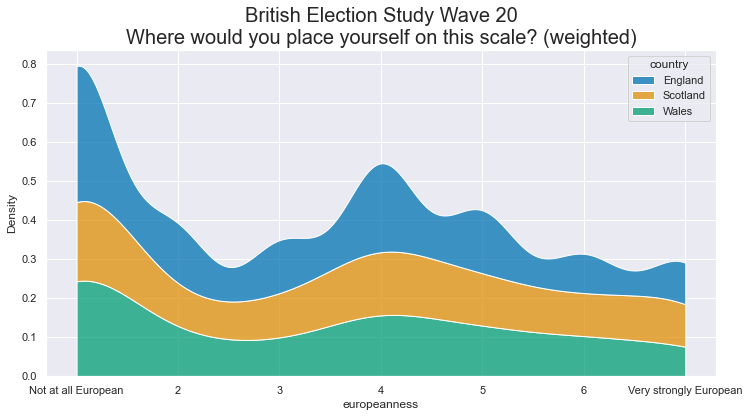

In [48]:
plt.figure(figsize=(12,6));
mask = df[["country","europeanness","wt"]].notnull().all(axis=1);
sns.kdeplot(data=df[mask], x="europeanness", hue="country",weights=df["wt"][mask],cut=0,multiple="stack",common_norm=False);
plt.gca().set_xticklabels(["0"]+list(BES_Panel["europeanness"].cat.categories[0:-1]));
plt.title("British Election Study Wave 20\nWhere would you place yourself on this scale? (weighted)",fontsize=20);

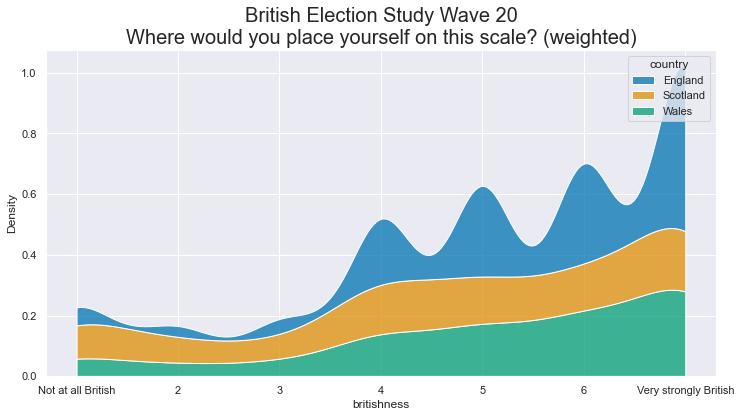

In [56]:
plt.figure(figsize=(12,6));
mask = df[["country","britishness","wt"]].notnull().all(axis=1);
sns.kdeplot(data=df[mask], x="britishness", hue="country",weights=df["wt"][mask],cut=0,multiple="stack",common_norm=False);
plt.gca().set_xticklabels(["0"]+list(BES_Panel["britishness"].cat.categories[0:-1]));
plt.title("British Election Study Wave 20\nWhere would you place yourself on this scale? (weighted)",fontsize=20);

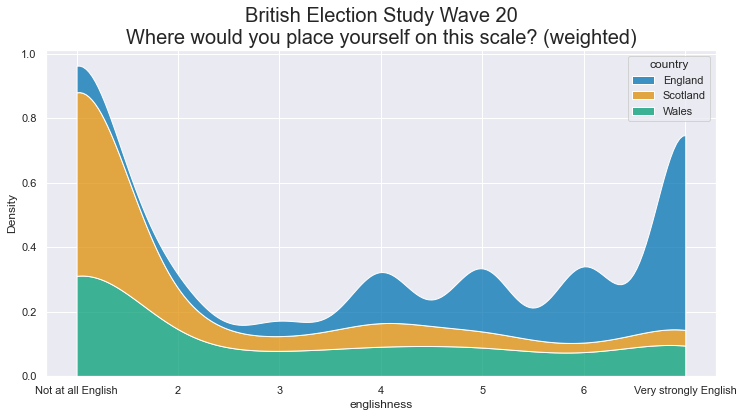

In [50]:
plt.figure(figsize=(12,6));
mask = df[["country","englishness","wt"]].notnull().all(axis=1);
sns.kdeplot(data=df[mask], x="englishness", hue="country",weights=df["wt"][mask],cut=0,multiple="stack",common_norm=False);
plt.gca().set_xticklabels(["0"]+list(BES_Panel["englishness"].cat.categories[0:-1]));
plt.title("British Election Study Wave 20\nWhere would you place yourself on this scale? (weighted)",fontsize=20);

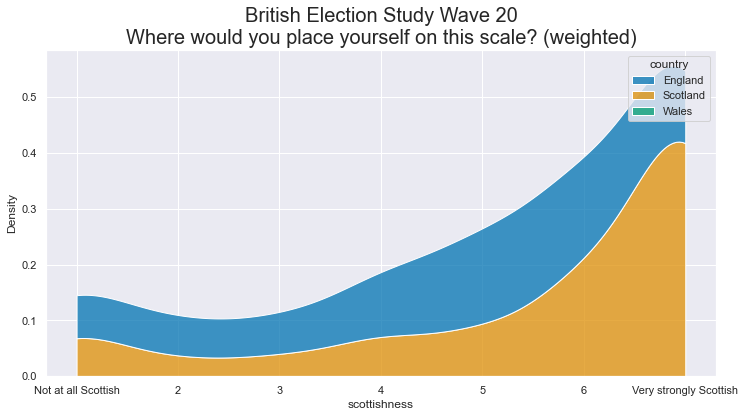

In [51]:
plt.figure(figsize=(12,6));
mask = df[["country","scottishness","wt"]].notnull().all(axis=1);
sns.kdeplot(data=df[mask], x="scottishness", hue="country",weights=df["wt"][mask],cut=0,multiple="stack",common_norm=False);
plt.gca().set_xticklabels(["0"]+list(BES_Panel["scottishness"].cat.categories[0:-1]));
plt.title("British Election Study Wave 20\nWhere would you place yourself on this scale? (weighted)",fontsize=20);

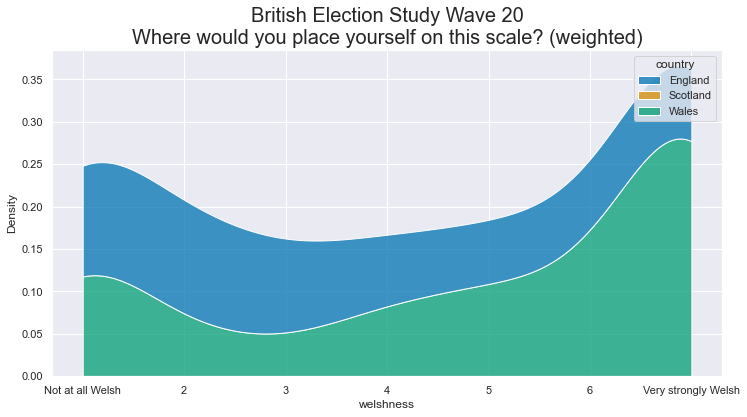

In [52]:
plt.figure(figsize=(12,6));
mask = df[["country","welshness","wt"]].notnull().all(axis=1);
sns.kdeplot(data=df[mask], x="welshness", hue="country",weights=df["wt"][mask],cut=0,multiple="stack",common_norm=False);
plt.gca().set_xticklabels(["0"]+list(BES_Panel["welshness"].cat.categories[0:-1]));
plt.title("British Election Study Wave 20\nWhere would you place yourself on this scale? (weighted)",fontsize=20);